In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
df_columns = ['rainfall_min', 'rainfall_max', 'rainfall_mean', 'rainfall_median', 'rainfall_std']

In [34]:
def outlier(col):
    plt.figure()
    ax = plt.gca()
    ax.boxplot(col)
    ax.set_ylabel('Value')

def detect_outliers(data):
    # 1분위수, 3분위수, IQR 계산
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1

    # 이상치 경계 설정
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # 이상치 식별
    outliers = (data < lower_bound) | (data > upper_bound)

    return outliers

In [35]:
df_visitor = pd.read_csv("assets/output/visitors.csv")

In [36]:
df_visitor['visitor'] = df_visitor['visitor'].str.replace(',', '')

In [37]:
df_visitor['visitor'] = df_visitor['visitor'].astype(int)

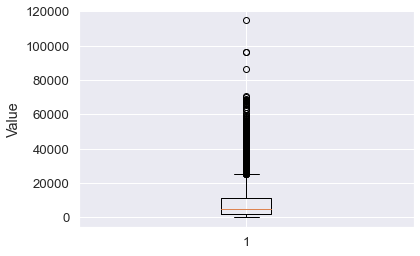

In [38]:
outlier(df_visitor['visitor'])

In [39]:
df_visitor.describe()

,visitor
count,3951.000000
mean,9122.186029
std,11653.034037
min,2.000000
25%,1840.000000
50%,4619.000000
75%,11280.500000
max,115002.000000


In [40]:
q1 = np.percentile(df_visitor['visitor'], 25)
q3 = np.percentile(df_visitor['visitor'], 75)
print("q1: {} q3: {}".format(q1, q3))

q1: 1840.0 q3: 11280.5


In [41]:
outliers = detect_outliers(df_visitor['visitor'])

In [42]:
non_outliers = df_visitor[~outliers]

In [43]:
non_outliers['visitor']

0       11483
1       14012
5        8374
6       13540
7       13507
        ...  
3946     2236
3947      925
3948      757
3949     2013
3950      628
Name: visitor, Length: 3586, dtype: int32

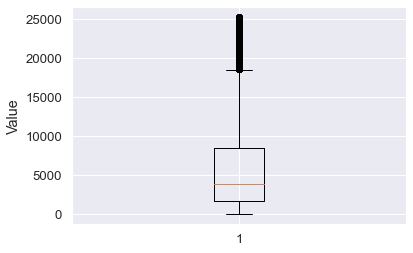

In [44]:
outlier(non_outliers['visitor'])

In [45]:
non_outliers.describe()

,visitor
count,3586.000000
mean,6098.088399
std,5901.432713
min,2.000000
25%,1692.250000
50%,3909.000000
75%,8441.000000
max,25286.000000


In [46]:
q1 = np.percentile(non_outliers['visitor'], 25)
q3 = np.percentile(non_outliers['visitor'], 75)
print("q1: {} q3: {}".format(q1, q3))

q1: 1692.25 q3: 8441.0


In [47]:
df = pd.read_csv('assets/output/finalDataset.csv')

In [48]:
df.describe()

,sulfur_dioxide_min,sulfur_dioxide_max,sulfur_dioxide_mean,sulfur_dioxide_median,carbon_monoxide_min,carbon_monoxide_max,carbon_monoxide_mean,carbon_monoxide_median,ozone_min,ozone_max,...,wind speed_median,wind direction_min,wind direction_max,wind direction_mean,wind direction_median,sky state_min,sky state_max,sky state_mean,sky state_median,weekday
count,3889.000000,3889.000000,3889.000000,3889.000000,3900.000000,3900.000000,3900.000000,3900.000000,3894.000000,3894.000000,...,3461.000000,3622.000000,3622.000000,3622.000000,3622.000000,3608.000000,3608.000000,3608.000000,3608.000000,3951.000000
mean,0.003175,0.006899,0.004596,0.004439,0.437077,0.867154,0.612769,0.599154,0.004906,0.043607,...,2.009130,75.197129,305.960243,206.021325,212.886527,1.698448,3.272173,2.464517,2.451635,3.996457
std,0.001772,0.004804,0.002757,0.002710,0.174039,0.434332,0.247412,0.249322,0.007060,0.025449,...,1.022607,84.659663,66.032773,68.474870,83.648714,0.893545,0.858869,0.918670,1.070474,1.998351
min,0.000000,0.001000,0.001000,0.001000,0.000000,0.100000,0.100000,0.100000,0.001000,0.001000,...,0.500000,0.000000,17.000000,8.500000,8.500000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.002000,0.004000,0.002750,0.003000,0.300000,0.600000,0.454167,0.400000,0.002000,0.026000,...,1.400000,8.000000,283.000000,163.444410,143.000000,1.000000,3.000000,1.662162,1.375000,2.000000
50%,0.003000,0.006000,0.003955,0.004000,0.400000,0.700000,0.558333,0.500000,0.002000,0.039000,...,2.000000,45.000000,324.500000,213.854730,229.000000,1.000000,3.000000,2.490398,3.000000,4.000000
75%,0.004000,0.009000,0.005542,0.005000,0.500000,1.000000,0.700000,0.700000,0.004000,0.059000,...,2.300000,119.000000,356.000000,256.430743,281.000000,2.000000,4.000000,3.195946,3.000000,6.000000
max,0.018000,0.070000,0.024458,0.024000,2.200000,4.100000,2.291667,2.200000,0.071000,0.176000,...,18.799999,316.000000,360.000000,333.695946,360.000000,4.000000,4.000000,4.000000,4.000000,7.000000


In [49]:
df_temp = df.drop('date', axis=1)

In [50]:
df_temp['visitor'] = df_temp['visitor'].str.replace(',', '')
df_temp['visitor'] = df_temp['visitor'].astype(int)

(array([2.992e+03, 5.250e+02, 2.460e+02, 1.050e+02, 5.600e+01, 2.000e+01,
        3.000e+00, 1.000e+00, 2.000e+00, 1.000e+00]),
 array([2.00000e+00, 1.15020e+04, 2.30020e+04, 3.45020e+04, 4.60020e+04,
        5.75020e+04, 6.90020e+04, 8.05020e+04, 9.20020e+04, 1.03502e+05,
        1.15002e+05]),
 <BarContainer object of 10 artists>)

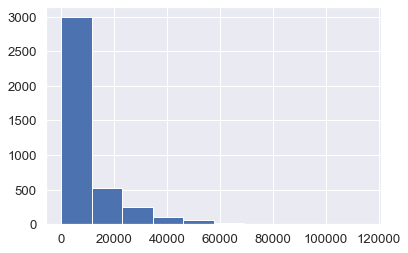

In [51]:
plt.hist(df_temp['visitor'])

In [52]:
df_temp

,sulfur_dioxide_min,sulfur_dioxide_max,sulfur_dioxide_mean,sulfur_dioxide_median,carbon_monoxide_min,carbon_monoxide_max,carbon_monoxide_mean,carbon_monoxide_median,ozone_min,ozone_max,...,wind direction_min,wind direction_max,wind direction_mean,wind direction_median,sky state_min,sky state_max,sky state_mean,sky state_median,weekday,visitor
0,0.003,0.004,0.003333,0.003,0.2,0.8,0.483333,0.50,0.002,0.045,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,11483
1,0.002,0.008,0.004000,0.004,0.1,0.5,0.354167,0.40,0.002,0.069,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,14012
2,0.004,0.008,0.005042,0.005,0.3,0.5,0.429167,0.40,0.002,0.069,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,58660
3,0.004,0.008,0.005875,0.006,0.3,0.6,0.437500,0.45,0.002,0.056,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,38961
4,0.005,0.009,0.006458,0.006,0.3,0.6,0.450000,0.50,0.002,0.062,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,34852
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3946,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,45.0,315.0,210.962121,225.0,1.0,3.0,2.000000,2.0,1.0,2236
3947,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,84.0,315.0,201.030303,180.0,1.0,2.0,1.098485,1.0,2.0,925
3948,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,180.0,270.0,239.174242,225.5,1.0,1.0,1.000000,1.0,3.0,757
3949,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,20.0,315.0,244.734848,268.0,1.0,2.0,1.151515,1.0,4.0,2013


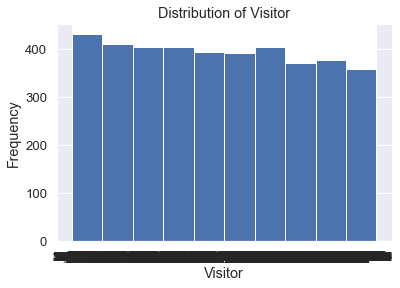

In [53]:
plt.hist(df['visitor'], bins=10)
plt.xlabel('Visitor')
plt.ylabel('Frequency')
plt.title('Distribution of Visitor')
plt.show()

In [54]:
df_temp['visitor'].sort_values()

1933         2
2912         2
2913         7
822          9
1922        11
         ...  
192      70880
1985     86100
581      96434
96       96434
922     115002
Name: visitor, Length: 3951, dtype: int32

In [55]:
df_temp['visitor'].sort_values(ascending=False)

922     115002
96       96434
581      96434
1985     86100
192      70880
         ...  
1922        11
822          9
2913         7
1933         2
2912         2
Name: visitor, Length: 3951, dtype: int32

In [56]:
df_temp['visitor'].describe()

count      3951.000000
mean       9122.186029
std       11653.034037
min           2.000000
25%        1840.000000
50%        4619.000000
75%       11280.500000
max      115002.000000
Name: visitor, dtype: float64

In [57]:
df_temp.corr()

,sulfur_dioxide_min,sulfur_dioxide_max,sulfur_dioxide_mean,sulfur_dioxide_median,carbon_monoxide_min,carbon_monoxide_max,carbon_monoxide_mean,carbon_monoxide_median,ozone_min,ozone_max,...,wind direction_min,wind direction_max,wind direction_mean,wind direction_median,sky state_min,sky state_max,sky state_mean,sky state_median,weekday,visitor
sulfur_dioxide_min,1.000000,0.717101,0.886875,0.879383,0.278581,0.549622,0.524752,0.506222,-0.057938,-0.198888,...,-0.050602,-0.000961,-0.050483,-0.041909,0.015151,-0.021184,0.012263,0.020717,0.000707,-0.017973
sulfur_dioxide_max,0.717101,1.000000,0.926645,0.882477,0.144221,0.645009,0.515637,0.476091,-0.122904,-0.057171,...,-0.027671,-0.056934,-0.078230,-0.073091,0.013743,-0.060595,-0.017500,-0.010682,-0.011926,0.018316
sulfur_dioxide_mean,0.886875,0.926645,1.000000,0.986069,0.225537,0.657898,0.574588,0.544222,-0.102826,-0.142812,...,-0.041435,-0.045120,-0.082625,-0.075736,0.017450,-0.054076,-0.008917,-0.000649,-0.013646,-0.003186
sulfur_dioxide_median,0.879383,0.882477,0.986069,1.000000,0.231989,0.640641,0.569752,0.544558,-0.098548,-0.155949,...,-0.038364,-0.044615,-0.082208,-0.075783,0.016898,-0.055294,-0.010584,-0.001641,-0.016156,-0.005825
carbon_monoxide_min,0.278581,0.144221,0.225537,0.231989,1.000000,0.487873,0.766097,0.757237,-0.045910,-0.248553,...,-0.053736,0.011199,-0.029418,-0.028786,0.054888,0.026764,0.052693,0.051175,0.008664,-0.092461
carbon_monoxide_max,0.549622,0.645009,0.657898,0.640641,0.487873,1.000000,0.899236,0.838875,-0.247765,-0.255660,...,-0.058632,-0.065338,-0.109442,-0.097005,0.098474,-0.002172,0.054889,0.055315,-0.001719,-0.109650
carbon_monoxide_mean,0.524752,0.515637,0.574588,0.569752,0.766097,0.899236,1.000000,0.978116,-0.203534,-0.278397,...,-0.063092,-0.044806,-0.089838,-0.079339,0.092876,0.010091,0.063117,0.063286,-0.001338,-0.103513
carbon_monoxide_median,0.506222,0.476091,0.544222,0.544558,0.757237,0.838875,0.978116,1.000000,-0.193106,-0.262983,...,-0.056295,-0.045245,-0.083002,-0.073549,0.087724,0.013459,0.061068,0.061476,0.000913,-0.088483
ozone_min,-0.057938,-0.122904,-0.102826,-0.098548,-0.045910,-0.247765,-0.203534,-0.193106,1.000000,0.054012,...,0.024968,0.026936,0.049921,0.042318,-0.061496,0.003802,-0.030446,-0.032299,0.028120,-0.013225
ozone_max,-0.198888,-0.057171,-0.142812,-0.155949,-0.248553,-0.255660,-0.278397,-0.262983,0.054012,1.000000,...,0.079326,0.049934,0.098980,0.096679,-0.072484,-0.062855,-0.081795,-0.075262,0.022374,0.262502


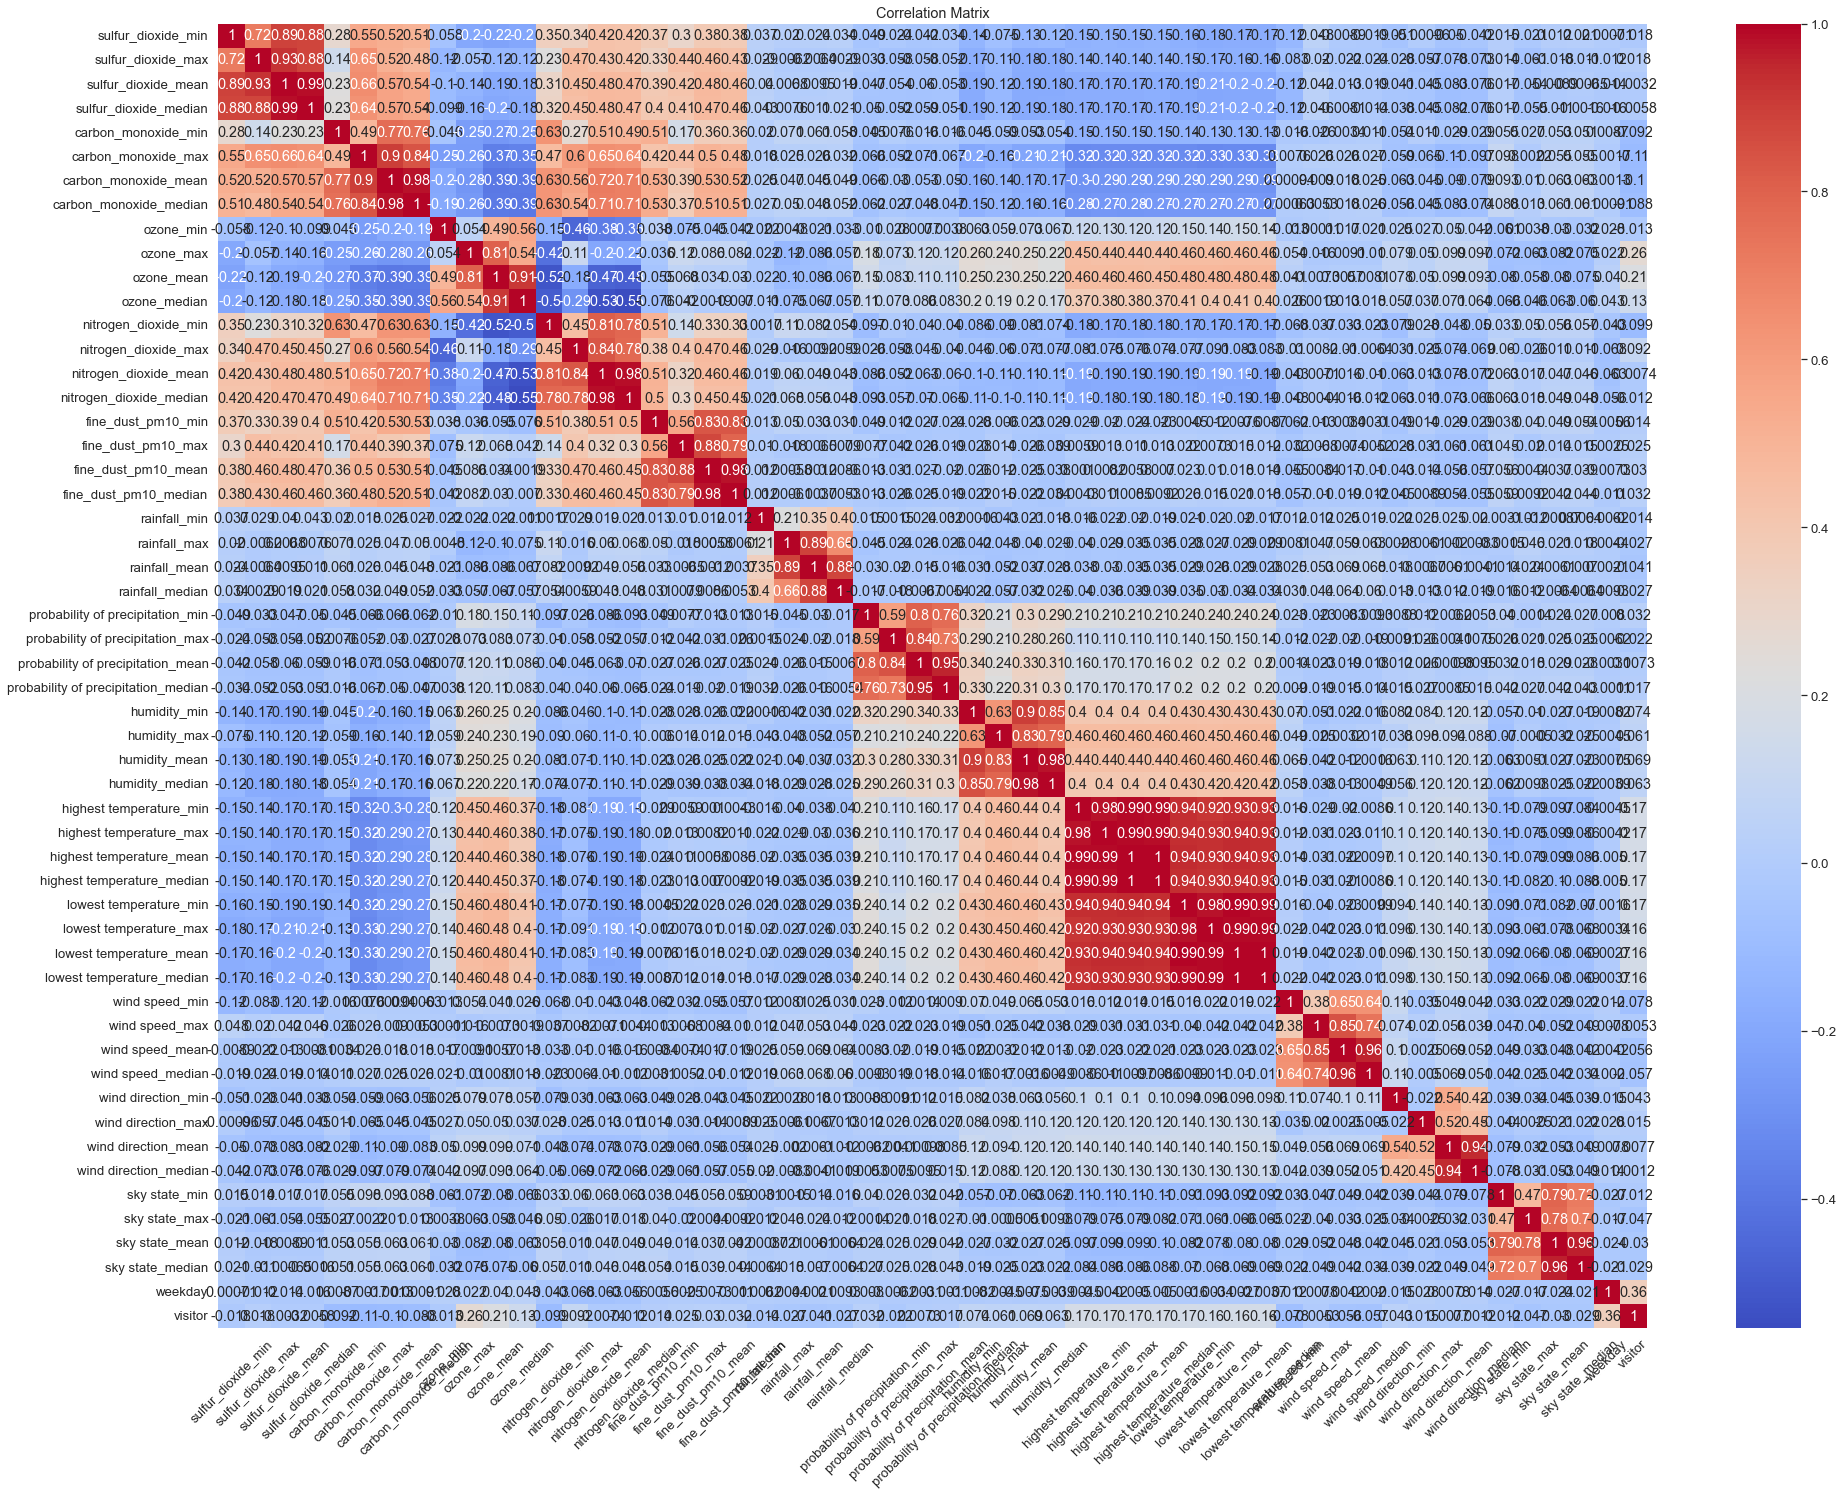

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

# 히트맵 크기 조정
plt.figure(figsize=(32, 24))
sns.set(font_scale=1.2)

# 히트맵 그리기
correlation_matrix = df_temp.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# x축과 y축 레이블 회전
plt.xticks(rotation=45)
plt.yticks(rotation=0)

# 그래프 제목 설정
plt.title('Correlation Matrix')

# 그래프 출력
plt.show()

In [59]:
# df.corr 기본 값은 pearson입니다
df_corr = df_temp.corr()

In [60]:
df_corr.iloc[:,-1]

sulfur_dioxide_min                    -0.017973
sulfur_dioxide_max                     0.018316
sulfur_dioxide_mean                   -0.003186
sulfur_dioxide_median                 -0.005825
carbon_monoxide_min                   -0.092461
carbon_monoxide_max                   -0.109650
carbon_monoxide_mean                  -0.103513
carbon_monoxide_median                -0.088483
ozone_min                             -0.013225
ozone_max                              0.262502
ozone_mean                             0.209007
ozone_median                           0.133354
nitrogen_dioxide_min                  -0.098548
nitrogen_dioxide_max                   0.091637
nitrogen_dioxide_mean                 -0.007416
nitrogen_dioxide_median               -0.012107
fine_dust_pm10_min                     0.013703
fine_dust_pm10_max                     0.024521
fine_dust_pm10_mean                    0.030355
fine_dust_pm10_median                  0.032179
rainfall_min                          -0

## 상관도 높은 순서: 오존, 온도, 일산화탄소
## sulfur_dioxide -> max, carbon_monoxide -> max, ozone -> max, nitrogen_dioxide -> min, fine_dust -> median, rainfall -> mean,
## probability of precipitation -> min, humidity -> min, highest temp -> max, lowest temp -> min, wind speed -> min, wind direction -> min, skystate -> max

In [61]:
df_temp.corr(method='kendall').iloc[:,-1]

sulfur_dioxide_min                    -0.086611
sulfur_dioxide_max                    -0.020730
sulfur_dioxide_mean                   -0.045059
sulfur_dioxide_median                 -0.051577
carbon_monoxide_min                   -0.076749
carbon_monoxide_max                   -0.095203
carbon_monoxide_mean                  -0.079189
carbon_monoxide_median                -0.066550
ozone_min                             -0.009060
ozone_max                              0.256463
ozone_mean                             0.167980
ozone_median                           0.081980
nitrogen_dioxide_min                  -0.036489
nitrogen_dioxide_max                   0.060412
nitrogen_dioxide_mean                 -0.002905
nitrogen_dioxide_median               -0.011605
fine_dust_pm10_min                     0.010208
fine_dust_pm10_max                     0.031155
fine_dust_pm10_mean                    0.018470
fine_dust_pm10_median                  0.020894
rainfall_min                           0

## 상관도 높은 순서: 오존, 온도, 습도 & 일산화탄소
## sulfur_dioxide -> min, carbon_monoxide -> max, ozone -> max, nitrogen_dioxide -> max, fine_dust -> max, rainfall -> max,
## probability of precipitation -> min, humidity -> min, highest temp -> max, lowest temp -> min, wind speed -> median,
## wind direction -> min, skystate -> max

In [62]:
df_temp.corr(method='spearman').iloc[:,-1]

sulfur_dioxide_min                    -0.118828
sulfur_dioxide_max                    -0.031310
sulfur_dioxide_mean                   -0.071292
sulfur_dioxide_median                 -0.076484
carbon_monoxide_min                   -0.106823
carbon_monoxide_max                   -0.142853
carbon_monoxide_mean                  -0.123697
carbon_monoxide_median                -0.098264
ozone_min                             -0.012717
ozone_max                              0.385184
ozone_mean                             0.252485
ozone_median                           0.122822
nitrogen_dioxide_min                  -0.052286
nitrogen_dioxide_max                   0.089513
nitrogen_dioxide_mean                 -0.005109
nitrogen_dioxide_median               -0.017816
fine_dust_pm10_min                     0.014561
fine_dust_pm10_max                     0.046354
fine_dust_pm10_mean                    0.027369
fine_dust_pm10_median                  0.031041
rainfall_min                           0

## 상관도 높은 순서: 오존, 온도, 습도 & 일산화탄소
## sulfur_dioxide -> min, carbon_monoxide -> max, ozone -> max, nitrogen_dioxide -> max, fine_dust -> max, rainfall -> max,
## probability of precipitation -> median, humidity -> min, highest temp -> max, lowest temp -> min, wind speed -> mean med유사,
## wind direction -> min, skystate -> max

# 종합
## sulfur_dioxide -> min, carbon_monoxide -> max, ozone -> max, nitrogen_dioxide -> max, fine_dust -> max, rainfall -> max,
## probability of precipitation -> min, humidity -> min, highest temp -> max, lowest temp -> min, wind speed -> med,
## wind direction -> median, skystate -> max

In [73]:
selected_feat = ['sulfur_dioxide_min', 'carbon_monoxide_max', 'ozone_max', 'nitrogen_dioxide_max', 'fine_dust_pm10_max',                 'rainfall_max', 'probability of precipitation_min', 'humidity_min', 'highest temperature_max',                 'lowest temperature_min', 'wind speed_median', 'wind direction_median', 'sky state_max', 'visitor']

In [74]:
df_selected = df_temp[selected_feat]

In [76]:
df_selected.corr().iloc[:,-1]

sulfur_dioxide_min                 -0.017973
carbon_monoxide_max                -0.109650
ozone_max                           0.262502
nitrogen_dioxide_max                0.091637
fine_dust_pm10_max                  0.024521
rainfall_max                       -0.027064
probability of precipitation_min    0.032412
humidity_min                        0.073718
highest temperature_max             0.171204
lowest temperature_min              0.166760
wind speed_median                  -0.056758
wind direction_median               0.001198
sky state_max                      -0.046511
visitor                             1.000000
Name: visitor, dtype: float64

In [77]:
df_selected.corr(method='kendall').iloc[:,-1]

sulfur_dioxide_min                 -0.086611
carbon_monoxide_max                -0.095203
ozone_max                           0.256463
nitrogen_dioxide_max                0.060412
fine_dust_pm10_max                  0.031155
rainfall_max                       -0.025397
probability of precipitation_min    0.047534
humidity_min                        0.089483
highest temperature_max             0.177105
lowest temperature_min              0.170267
wind speed_median                  -0.072914
wind direction_median               0.031185
sky state_max                      -0.035104
visitor                             1.000000
Name: visitor, dtype: float64

In [78]:
df_selected.corr(method='spearman').iloc[:,-1]

sulfur_dioxide_min                 -0.118828
carbon_monoxide_max                -0.142853
ozone_max                           0.385184
nitrogen_dioxide_max                0.089513
fine_dust_pm10_max                  0.046354
rainfall_max                       -0.033746
probability of precipitation_min    0.061969
humidity_min                        0.129106
highest temperature_max             0.259668
lowest temperature_min              0.248655
wind speed_median                  -0.104032
wind direction_median               0.046456
sky state_max                      -0.045397
visitor                             1.000000
Name: visitor, dtype: float64